# INI-Retreat Transformer Workshop

## Introduction

<div>
<img src="images/transformer_architecture.png" width="400"/>
</div>

Transformers are models that have garnered significant attention in recent years due to their advancements in processing sequential data and handling varying data sizes. Unlike recurrent architectures, Transformers offer excellent parallelization, enabling faster training. The attention mechanism, a key component of Transformers, was first introduced by Bahdanau et al. in 2015, with a focus on machine translation. The full Transformer architecture was later popularized by Vaswani et al. in their seminal 2017 paper, "Attention is All You Need." Since then, the Transformer model has among other things revolutionized Natural Language Processing (NLP), driving substantial progress in the field.

Today, many companies have developed large-scale models that far exceed the memory and power capacities available to most researchers and individuals. As these models continue to grow, improving their energy efficiency is crucial. The more people who understand how Transformers work, the more potential there is for innovative ideas to enhance and optimize them.

This notebook is designed to introduce you to the core components of the original Transformer model, focusing on its architecture and practical applications, particularly in Natural Language Processing. By gaining a deeper understanding, you might contribute to the next wave of advancements in this exciting field. 

No coding experience is necessary to follow along, but feel free to explore the code behind each widget to see how it’s implemented. Have fun!


## Natural Language Processing

Natural Language Processing (NLP) has intrigued scientists since the early days of modern computing. As far back as 1945, Alan Turing introduced his famous Turing Test, which used language capabilities as a criterion for determining machine intelligence. From those beginnings, research in NLP has evolved through several phases: from symbolic (rule-based) approaches in the early days to statistical methods starting in the late 1980s, and finally, to neural networks. Today, the state of the art (SOTA) in NLP is driven by various Transformer architectures.

The ability to interpret language is a distinctly human-like skill, which makes it naturally resonate with us. Due to the rapid progress in NLP, some people might be quick to assume that general artificial intelligence is just around the corner. However, to demystify the technology a little bit, we will now walk through the process step by step—from words to predictions within the Transformer model.

<div>
<img src="images/turing_test.png" width="200"/>
</div>

### Word Embeddings

To apply the Transformer model to language tasks, human-readable text must first be converted into numerical values that can be processed by neural networks. This involves two key steps: tokenization and mapping tokens to an embedding space. Tokenization refers to breaking down text into the smallest meaningful units called tokens, each of which is assigned a unique ID based on a predefined vocabulary. A crucial challenge in constructing this vocabulary is balancing memory efficiency with the need for a comprehensive and expressive token set. Vocabularies are typically constructed algorithmically (for example using Byte-Pair encoding), with tokens ranging from individual characters to parts of words or entire words. Special tokens may also be included for indicating the beginning of a context or masking values.

#### Byte-Pair encoding

Byte-Pair Encoding (BPE) is a popular algorithm for generating vocabularies used in tokenization, commonly employed by Transformer models like GPT, GPT-2, RoBERTa, BART, and DeBERTa. The BPE algorithm starts with a text corpus and a target vocabulary size. Initially, the text is split into individual characters, which serve as the initial vocabulary. The algorithm then iteratively identifies the most frequent pair of adjacent tokens (or byte-pair) in the text and merges them into a new token. This new token is added to the vocabulary. The process repeats, merging the most frequent byte-pairs and expanding the vocabulary until the desired size is reached. BPE effectively balances vocabulary size and token expressiveness, allowing models to efficiently represent words and subwords.


#### Experiment

Now, you can experiment with BPE using the simple implementation provided below. As a test, try using the content of an entire Wikipedia page as your text corpus and set a larger vocabulary size, such as 4,000 tokens. Afterward, input your own text below to see how it gets tokenized. Do you notice that the words you expected to be frequent in the corpus are indeed used as tokens?

In [1]:
# Byte-Pair Encoding Experiment
from collections import Counter
import re
import ipywidgets as widgets
from IPython.display import display, clear_output
from tqdm.notebook import tqdm

# merge the occurrences of a specific pair of tokens in a token list
def merge(token_list, pair):
    i = 0
    while i < len(token_list) - 1:
        if token_list[i] + token_list[i + 1] == pair:
            token_list = token_list[:i] + [pair] + token_list[i + 2 :]
        else:
            i += 1
    return token_list

# get a vocabulary using byte-pair encoding with a progress display
def byte_pair_encoding(text, vocab_size):
    vocab = set(text)
    
    iterations_needed = vocab_size - len(vocab)
    if iterations_needed <= 0:
        vocab = [(token, token_id) for token_id, token in enumerate(vocab)]
        return sorted(vocab, key=len, reverse=True)

    words = re.findall(r" {0,1}[a-zA-Z]+|[^a-zA-Z]", text)
    words = list(map(list, words))

    for i in tqdm(range(iterations_needed)):
        pairs_count = Counter([(c1, c2) for w in words for c1, c2 in zip(w, w[1:])])
        if not pairs_count:
            break
        most_common = max(pairs_count, key=pairs_count.get)
        most_common = ''.join(most_common)
        vocab.add(most_common)
        words = [merge(w, most_common) for w in words]
    vocab = [(token, token_id) for token_id, token in enumerate(vocab)]
    return sorted(vocab, key=lambda t: len(t[0]), reverse=True)

# Tokenization function
def tokenize(text, sorted_vocab, show_ids=False):
    tokens = []
    i = 0
    while i < len(text):
        match = False
        for word, word_id in sorted_vocab:
            if text[i:i+len(word)] == word:
                tokens.append((word, word_id) if show_ids else word)
                i += len(word)
                match = True
                break
        if not match:
            i += 1
    return tokens


# Function to update vocabulary with progress
vocab = []
show_ids = False

def update_vocab(corpus, vocab_size):
    global vocab
    vocab = byte_pair_encoding(corpus, vocab_size)
    clear_output(wait=True)
    if len(vocab) > 200:
        print("Vocabulary generated:", f"[{', '.join(str(x) for x in vocab[:100])},\n\n ... \n\n{', '.join(str(x) for x in vocab[-100:])}]")
    else:
        print("Vocabulary generated:", vocab)

# Function to tokenize text using the current vocabulary
def tokenize_text(text, show_ids):
    global vocab
    tokens = tokenize(text, vocab, show_ids)
    clear_output(wait=True)
    print("Tokenized text:", tokens)

# Interactive widgets
corpus_widget = widgets.Text(placeholder='Input corpus here.', description='Text Corpus:', value="ABCD")
vocab_size_widget = widgets.BoundedIntText(value=1, min=1, max=5000, step=1, description='Vocab-size:')
text_widget = widgets.Text(placeholder='Write text here to tokenize.', description='To tokenize:')
checkbox_widget = widgets.Checkbox(value=False, description='Show IDs')

# Link corpus and vocab_size to vocabulary generation
interact_vocab = widgets.interactive_output(update_vocab, {'corpus': corpus_widget, 'vocab_size': vocab_size_widget})

# Link text to tokenization
interact_tokenize = widgets.interactive_output(tokenize_text, {'text': text_widget, 'show_ids': checkbox_widget})

# Display the widgets
display(corpus_widget, vocab_size_widget, interact_vocab, text_widget, checkbox_widget, interact_tokenize)


Text(value='ABCD', description='Text Corpus:', placeholder='Input corpus here.')

BoundedIntText(value=1, description='Vocab-size:', max=5000, min=1)

Output()

Text(value='', description='To tokenize:', placeholder='Write text here to tokenize.')

Checkbox(value=False, description='Show IDs')

Output()

Lets also have a look at the Tokenizer from the 125-million parameter OPT Model, an open-source version of GPT-2.

It will break down the text into individual tokens, showing each token as a string along with its corresponding ID. This Tokenizer has a total vocabulary of 50265 different tokens and was initialized on a huge corpus of text.

In [10]:
# OPT Model Tokenization
from transformers import AutoTokenizer
import ipywidgets as widgets
from ipywidgets import interact

# load the tokenizer of the smallest OPT-Model
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")

# tokenize to infut ids and decode
def get_tokenization(text):
    ids = tokenizer(text)['input_ids']
    token = [tokenizer.decode(x) for x in ids]
    print('(TOKEN, TOKEN-ID): '+', '.join(str(x) for x in zip(token, ids)))

# for interaction
f = lambda x: get_tokenization(x)
interact(f, x=widgets.Text(placeholder='Write text here to encode.', description='Input:'));

interactive(children=(Text(value='', description='Input:', placeholder='Write text here to encode.'), Output()…

**Things you might notice:**
- Some words have individual tokens, while other words are broken down into multiple tokens.
- This tokenizer always adds a `</s>` token, which marks the start of the input sequence.
- This tokenizer adds a space before a token if it follows a space in the text, which changes how the token is encoded.

#### The Embedding Space

The embedding space in a transformer model is a high-dimensional space where each dimension is determined by the model's architecture. This space remains consistent in size throughout the model. In modern transformers, token IDs are mapped to this embedding space using a linear projection, which is a part of the model's architecture and is trained alongside the rest of the model. This projection is applied individually to each token, without considering the context of the token within the sentence. The projection is typically represented by a matrix $E \in \mathbb{R}^{\text{vocab} \times d_\text{embed}}$ functioning as a lookup table that multiplies with a one-hot encoded vector representing the token ID. In this embedding space, words with similar meanings are expected to be close to each other.

<div>
<img src="images/path.png" width="700"/>
</div>

A key point to remember is that because of the way computations are done in the Attention layers (which we’ll cover later), it's more useful to think about similarity by comparing the directions of vectors rather than their magnitudes. Instead of focusing on the absolute distance between points in space, we look at vectors originating from the origin and compare them using cosine similarity. Cosine similarity measures how aligned the vectors are: it returns 1 if they overlap, 0 if they are orthogonal, and -1 if they are in opposite directions. The cosine similarity between two vectors $\vec{a}$ and $\vec{b}$ is formulated as:

$$
\text{cosine similarity} = \text{cos}(\theta) = \frac{\vec{a} \cdot \vec{b}}{\lVert \vec{a} \rVert \lVert \vec{b} \rVert}
$$

<div>
<img src="images/cosine-similarity-vectors.original.jpg" width="900"/>
</div>



#### Experiment

Below, you can experiment with the cosine similarity of different tokens in the initial embedding space and look at their top-k most similar other tokens. Do you observe that related words receive higher cosine-similarities?
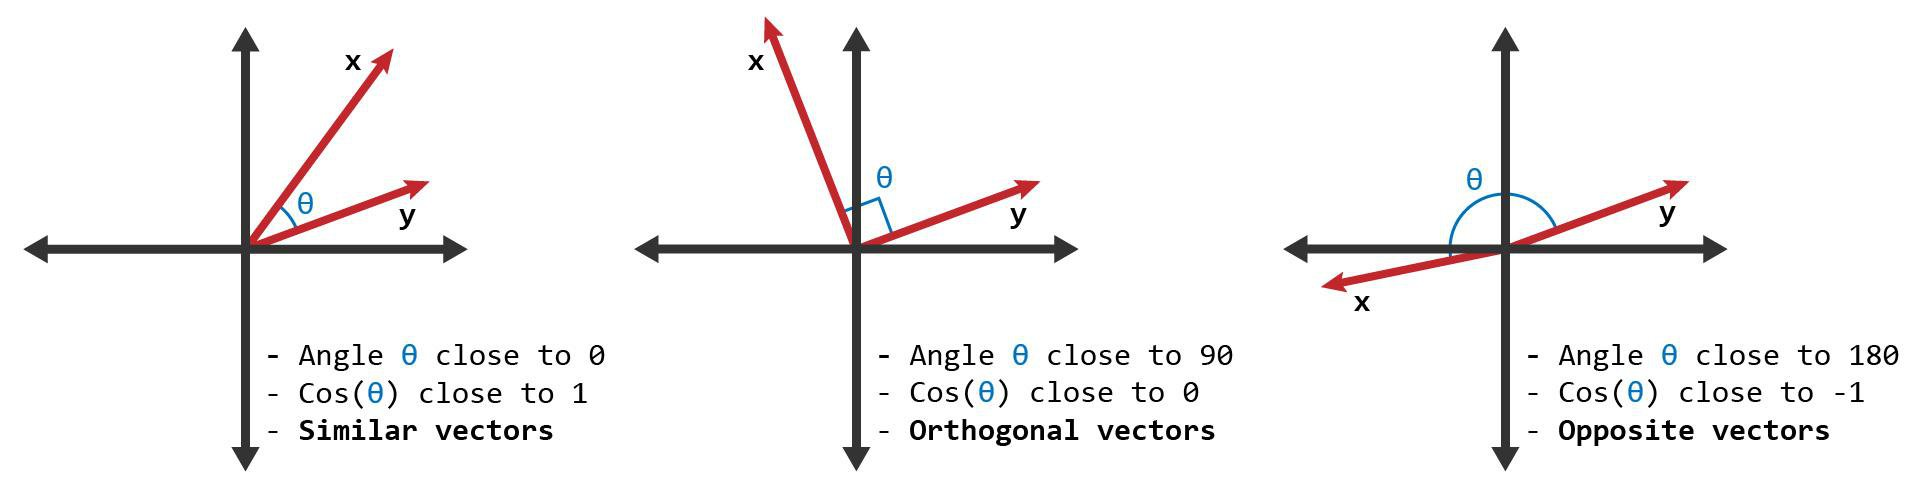

In [9]:
# Cosine-Similarity Experiment
from transformers import GPT2Tokenizer, AutoModel
import ipywidgets as widgets
from IPython.display import display, HTML
import torch.nn.functional as F
import warnings
import torch
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

model = AutoModel.from_pretrained("facebook/opt-125m")
tokenizer = GPT2Tokenizer.from_pretrained("facebook/opt-125m")

vocab_tokens = tokenizer.get_vocab().keys()
vocab_tokens_list = [x.replace('Ġ', '␣') for x in vocab_tokens]

cb1 = widgets.Combobox(
    placeholder='Word',
    value='King',
    options=vocab_tokens_list,
    description='Word 1:',
    ensure_option=True,
)

cb2 = widgets.Combobox(
    placeholder='Word',
    value='Queen',
    options=vocab_tokens_list,
    description='Word 2:',
    ensure_option=True,
)

k_range_slider = widgets.IntRangeSlider(
    value=[1, 5],
    min=1,
    max=100,
    step=1,
    description='Top-k range:',
)

calculate_button = widgets.Button(
    description='Calculate Similarity',
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
)

output = widgets.Output()

# Store the whole top-k for each word
top_k_similar_w1 = None
top_k_similar_w2 = None
cosine_similarity_score = None

def embed(word):
    word = word.replace('␣', ' ')
    inpt = tokenizer(word, return_tensors="pt", add_special_tokens=False)['input_ids'][0]
    token = tokenizer.decode(inpt)
    embedding_layer = model.decoder.embed_tokens
    token_embeddings = embedding_layer(inpt)
    return token, token_embeddings

def get_top_k_similar_tokens(embedding, top_k=20):
    with torch.no_grad():
        embedding_matrix = model.decoder.embed_tokens.weight.cpu().numpy()
    
    token_embedding = embedding.detach().numpy().reshape(1, -1)
    similarities = cosine_similarity(token_embedding, embedding_matrix).flatten()
    
    top_k_indices = similarities.argsort()[-top_k-1:-1][::-1]
    top_k_tokens = [word.replace('Ġ', '␣') if word is not None else "" for word in tokenizer.convert_ids_to_tokens(top_k_indices)]
    
    return list(zip(top_k_tokens, similarities[top_k_indices]))

def on_button_click(b):
    global top_k_similar_w1, top_k_similar_w2, cosine_similarity_score
    with output:
        output.clear_output()
        word1 = cb1.value
        word2 = cb2.value
        top_k_range = k_range_slider.value
        
        w1, v1 = embed(word1)
        w2, v2 = embed(word2)
        cosine_similarity_score = F.cosine_similarity(v1, v2, dim=-1).item()
        
        top_k_similar_w1 = get_top_k_similar_tokens(v1, top_k=100)
        top_k_similar_w2 = get_top_k_similar_tokens(v2, top_k=100)
        
        display_top_k_results(top_k_similar_w1, top_k_similar_w2, w1, w2, top_k_range, cosine_similarity_score)

def display_top_k_results(top_k_similar_w1, top_k_similar_w2, w1, w2, top_k_range, cosine_similarity_score):
    k_min, k_max = top_k_range
    
    df_w1 = pd.DataFrame(top_k_similar_w1[k_min-1:k_max], columns=['Token', 'Cosine Similarity'])
    df_w1['Cosine Similarity'] = df_w1['Cosine Similarity'].round(4)  # Round for better readability
    df_w1.index = range(k_min, k_min + len(df_w1))  # Adjust index to fit the specified range
    
    df_w2 = pd.DataFrame(top_k_similar_w2[k_min-1:k_max], columns=['Token', 'Cosine Similarity'])
    df_w2['Cosine Similarity'] = df_w2['Cosine Similarity'].round(4)  # Round for better readability
    df_w2.index = range(k_min, k_min + len(df_w2))  # Adjust index to fit the specified range
    
    display(HTML(f"""
    <div style="text-align: center;">
        <h3>Cosine Similarity between '{w1}' and '{w2}': {cosine_similarity_score:.3f}</h3>
    </div>
    <div style="display: flex; justify-content: space-around; gap: 10px;">
        <div>
            <h4>Top {k_min}-{k_max} tokens similar to '{w1}':</h4>
            {df_w1.to_html(index=True)}
        </div>
        <div>
            <h4>Top {k_min}-{k_max} tokens similar to '{w2}':</h4>
            {df_w2.to_html(index=True)}
        </div>
    </div>
    """))

def on_slider_change(change):
    if top_k_similar_w1 and top_k_similar_w2:
        with output:
            output.clear_output()
            top_k_range = k_range_slider.value
            word1 = cb1.value
            word2 = cb2.value
            display_top_k_results(top_k_similar_w1, top_k_similar_w2, word1, word2, top_k_range, cosine_similarity_score)

calculate_button.on_click(on_button_click)

k_range_slider.observe(on_slider_change, names='value')

display(cb1, cb2, k_range_slider, calculate_button, output)

Combobox(value='King', description='Word 1:', ensure_option=True, options=('<s>', '<pad>', '</s>', '<unk>', '.…

Combobox(value='Queen', description='Word 2:', ensure_option=True, options=('<s>', '<pad>', '</s>', '<unk>', '…

IntRangeSlider(value=(1, 5), description='Top-k range:', min=1)

Button(button_style='success', description='Calculate Similarity', style=ButtonStyle())

Output()

### Positional Encodings

<div>
<img src="images/fish_eats_cat.jpg" width="100"/>
</div>

The Transformer is not a recurrent architecture. While this offers advantages like parallelizability, it also introduces challenges, such as the model's lack of inherent order awareness in input sequences. To address this, we add positional encodings to the embedded input vectors, enabling the Transformer to differentiate between sequences like _'the cat ate the fish'_ and _'the fish ate the cat.'_ or of course _'fishthe cat ate the'_. Positional encodings can for example be achieved by adding sinusoidal functions of varying frequencies to each dimension of the embedding space:
$$
\text{PE}(\text{pos}, 2i) = \text{sin}\left(\text{pos}~/~10000^{~2i~/~d_\text{model}}\right)
$$
$$
\text{PE}(\text{pos}, 2i+1) = \text{cos}\left(\text{pos}~/~10000^{~2i~/~d_\text{model}}\right)
$$

With $d_\text{model}$ being the number of embedding dimensions, $\text{pos}$ being the position in the inputted sequence of tokens and $\text{i}$ being the dimension of the embedding vector the value is added to.

The following interactive widget visualizes selected dimensions of positional encoding across token positions. Use the slider to explore how the encoding changes at different positions, with the current position highlighted by a red dot in each dimension.

interactive(children=(IntSlider(value=0, description='Position', max=15), Output()), _dom_classes=('widget-int…

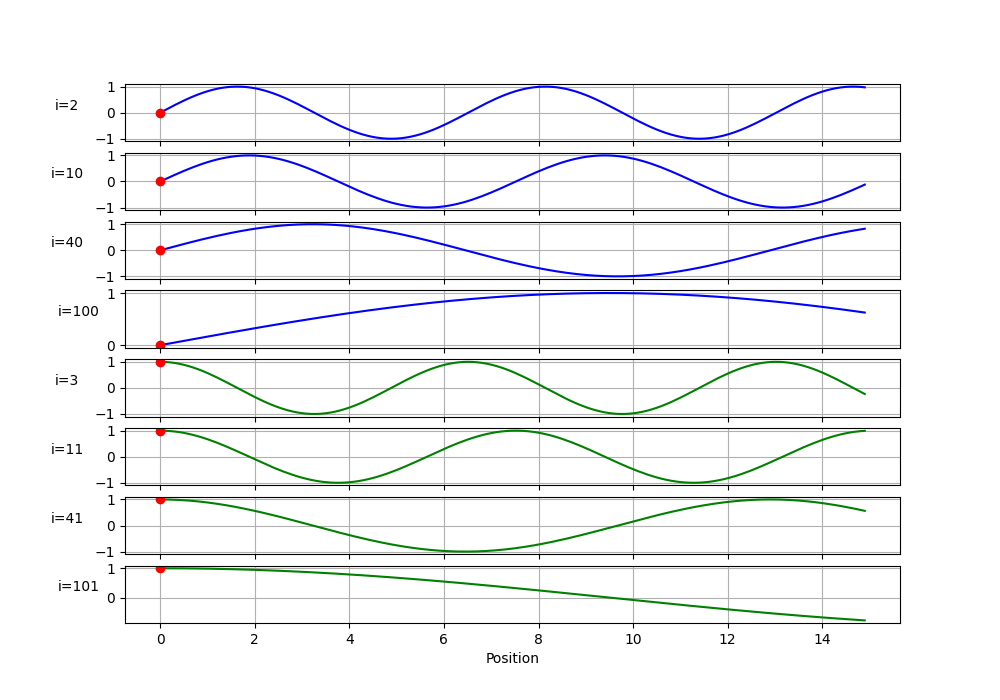

In [14]:
# Sinosoidal Encoding Visualization
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def positional_encoding(pos, i, d_model):
    angle = pos / np.power(10000, 2 * i / d_model)
    return np.sin(angle), np.cos(angle)

def update_plots(pos, d_model, x):
    dims = [1, 5, 20, 50]
    for k, i in enumerate(dims):
        sin_vals, cos_vals = positional_encoding(x, i, d_model)
        
        ax_sin[k].cla()
        ax_sin[k].plot(x, sin_vals, label=f'Sin: i={2*i}', color='blue')
        sin_val, _ = positional_encoding(pos, i, d_model)
        ax_sin[k].plot(pos, sin_val, 'ro')  # Red dot for sin
        ax_sin[k].set_ylabel(f'i={2*i}', rotation=0, labelpad=20)
        ax_sin[k].grid(True)

        ax_cos[k].cla()
        ax_cos[k].plot(x, cos_vals, label=f'Cos: i={2*i+1}', color='green')
        _, cos_val = positional_encoding(pos, i, d_model)
        ax_cos[k].plot(pos, cos_val, 'ro')  # Red dot for cos
        ax_cos[k].set_ylabel(f'i={2*i+1}', rotation=0, labelpad=20)
        ax_cos[k].grid(True)

    ax_cos[-1].set_xlabel('Position')
    fig.canvas.draw()

dims = [1, 5, 20, 50]
d_model = 512
x = np.arange(0, 15, 0.1)
l_dims = len(dims)

fig, ax = plt.subplots(2 * l_dims, 1, figsize=(10, 7), sharex=True)
ax_sin = ax[:l_dims]
ax_cos = ax[l_dims:]

update_plots(0, d_model, x)

pos_slider = widgets.IntSlider(value=0, min=0, max=15, step=1, description='Position')
widgets.interact(update_plots, pos=pos_slider, d_model=widgets.fixed(d_model), x=widgets.fixed(x));

The final embedding $\text{H}$ becomes:

$$
\text{H}(\text{token}, \text{pos}) = \text{TE}(\text{token}) + \text{PE}(\text{pos})
$$
Where $\text{TE}$ is the initial token embedding.

A common question is why adding the positional embedding to the token embedding doesn't distort the token's meaning. One way to attempt to answer this is:

> Randomly chosen vectors in high dimensions tend to be nearly orthogonal.

This implies that with a sufficiently large embedding dimension, the vector, when projected into the subspaces of token embedding and positional embedding, will still point in a similar direction as before, but with the added benefit of combined information.

#### Other Positional Encodings

There are also other methods to generate positional encodings than the above sinosoidal method. For instance, the OPT model learns its positional encoding during network training. Other approaches include relative positional encodings, which consider the relative positions between tokens, and rotary positional encodings.

Let's have a look at the learned positional encodings of a small BERT model:

interactive(children=(IntText(value=0, description='Dimension:'), Output()), _dom_classes=('widget-interact',)…

<function __main__.update_plot(dim)>

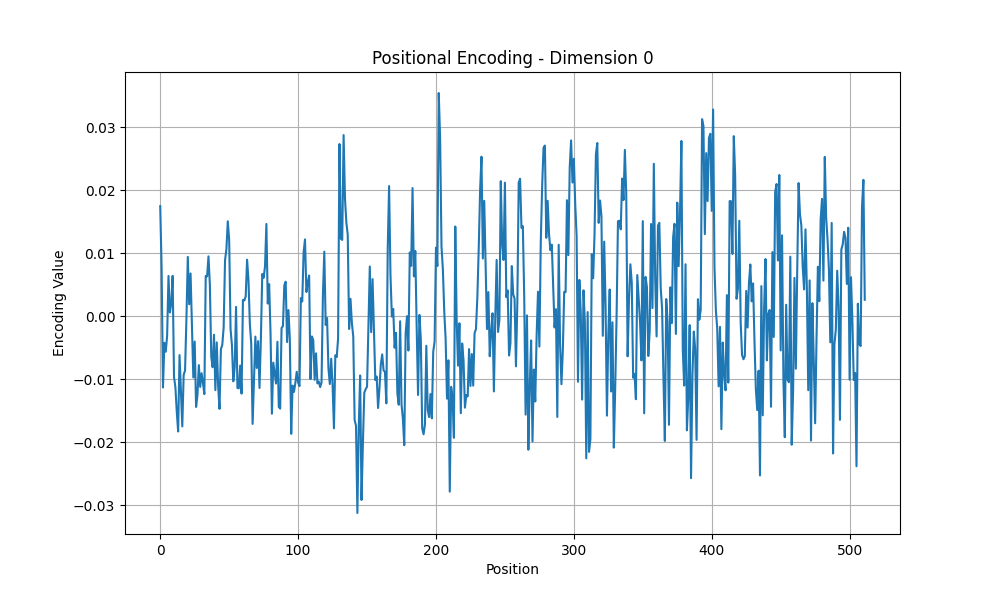

In [21]:
# BERT Positional Encodings Visualization
%matplotlib widget
import torch
from transformers import BertModel
import matplotlib.pyplot as plt
from ipywidgets import interact, IntText

# Load BERT base uncased model
model = BertModel.from_pretrained('bert-base-uncased')

# Get the positional encodings from the embedding layer
positional_encodings = model.embeddings.position_embeddings.weight.detach().cpu().numpy()

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(positional_encodings[:, 0])  # Start with the first dimension
ax.set_title(f'Positional Encoding - Dimension 0')
ax.set_xlabel('Position')
ax.set_ylabel('Encoding Value')
ax.grid(True)

# Define a function to update the plot for a specific dimension
def update_plot(dim):
    if 0 <= dim < positional_encodings.shape[1]:
        line.set_ydata(positional_encodings[:, dim])
        ax.set_title(f'Positional Encoding - Dimension {dim}')
        fig.canvas.draw_idle()

# Create an interactive widget
dim_selector = IntText(value=0, min=0, max=positional_encodings.shape[1]-1, description='Dimension:', continuous_update=False)
interact(update_plot, dim=dim_selector)

As you can see, unlike the purely mathematical sinusoidal embeddings, the learned embeddings are non-periodic and not smooth. However, since BERT's positional embeddings are learned, they might encode position-specific information that is particularly useful for tasks BERT was trained on, such as next sentence prediction and masked language modeling.

#### Experiment

To understand how Positional Encoding gives the Transformer its sense of order, you can input a text and create a permutation by dragging the tokens below. Type `[MASK]` in place of the words you want the model to guess. Then, you can choose to permute either the inputted tokens or the Positional Encoding using that permutation.

Notice that when you permute both the Positional Encoding and the input tokens in the same way, the Transformer predicts the same words as when using no permutation. In this experiment, you'll use a BERT model.

In [6]:
# Positional Embedding Experiment
import torch
import ipywidgets as widgets
from IPython.display import display
from transformers import BertForMaskedLM, AutoTokenizer
import matplotlib.pyplot as plt
import torch.nn.functional as F
import logging
import warnings

# surpress renaming warnings
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)
warnings.simplefilter("ignore", FutureWarning)

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

inpt = None
tokens = []
permutation = torch.Tensor([])

output = widgets.Output()

def permute_inputs(inputs, permutation, permute_ids=True, permute_positions=True):
    outputs = {}
    for k,v in inputs.items():
        if k == 'position_ids' and permute_positions:
            outputs[k] = v[permutation]
        elif k != 'position_ids' and permute_ids:
            outputs[k] = v[:,permutation]
        else:
            outputs[k] = v
    return outputs

def update_permutation(ordered_tags):
    global permutation
    fixed_tokens = [tokens[0]] + ordered_tags + [tokens[-1]]
    permutation = torch.LongTensor([tokens.index(tag) for tag in fixed_tokens])

def tokenize(text):
    global inpt, tokens
    inpt = tokenizer(text, return_tensors="pt")
    inpt['position_ids'] = torch.tensor(list(range(inpt['input_ids'].shape[1])))
    tokens = [str((tokenizer.decode([token_id]).strip(), i)) for i, token_id in enumerate(inpt['input_ids'][0])]
    
    if len(tokens) > 2:
        reorderable_tokens = tokens[1:-1]
    else:
        reorderable_tokens = []
    
    with output:
        output.clear_output(wait=True)
        tags_input.allowed_tags = reorderable_tokens
        tags_input.value = reorderable_tokens
        update_permutation(tags_input.value)

def on_tags_change(change):
    if len(change['new']) != len(tags_input.allowed_tags):
        tags_input.value = tags_input.allowed_tags  # Restore original value


def masked_prediction(inpt, permutation, permute_ids, permute_positions):
    
    with output:
        output.clear_output(wait=True)  # Clear previous outputs
        
        if inpt == None or inpt['input_ids'].numel() == 0:
            print("You can't use an empty sequence for prediction")
            return
        
        model = BertForMaskedLM.from_pretrained("bert-base-uncased")
        model.eval()
        
        inpt = permute_inputs(inpt, permutation, permute_ids, permute_positions)
                        
        with torch.no_grad():
            outputs = model(**inpt)
            logits = outputs.logits

        top_k = 5

        mask_token_indices = torch.where(inpt['input_ids'] == tokenizer.mask_token_id)[1]
        
        num_masks = len(mask_token_indices)
        if num_masks == 0:
            print("You need to include a [MASK] token for prediction")
            return

        fig, axs = plt.subplots(1, num_masks, figsize=(10, 4))
        
        if num_masks == 1:
            axs = [axs]

        for i, idx in enumerate(mask_token_indices):
            mask_token_logits = logits[0, idx, :]

            softmax_probs = F.softmax(mask_token_logits, dim=0)

            top_token_probs, top_token_ids = torch.topk(softmax_probs, top_k, dim=0)

            predicted_tokens = [tokenizer.decode([token_id]).strip() for token_id in top_token_ids]
            predicted_confidences = top_token_probs.tolist()

            axs[i].bar(predicted_tokens, predicted_confidences, color='blue')
            axs[i].set_xlabel('Predicted Tokens')
            axs[i].set_ylabel('Confidence')

            name = idx.item()
            if permute_ids:
                name = permutation[idx].item()
            axs[i].set_title(f"Predictions for ('[MASK]', {name})")
            axs[i].set_ylim(0, 1)

        plt.show()

def on_predict_button_click(b):
    masked_prediction(inpt, permutation, permute_ids_checkbox.value, permute_positions_checkbox.value)

text_input = widgets.Text(placeholder='Write text here to encode.', description='Input:')
text_input.observe(lambda change: tokenize(change['new']), names='value')
tags_input = widgets.TagsInput(value=[], allowed_tags=[], allow_duplicates=False)

# Observe changes in tags order to update the permutation and prevent deletion
tags_input.observe(on_tags_change, names='value')
tags_input.observe(lambda change: update_permutation(change['new']), names='value')

# Create checkboxes for permute_input and permute_encoding
permute_ids_checkbox = widgets.Checkbox(value=False, description='Permute Inputs')
permute_positions_checkbox = widgets.Checkbox(value=False, description='Permute Encodings')

# Create a button to trigger the prediction
predict_button = widgets.Button(description="Run Prediction")
predict_button.on_click(on_predict_button_click)

# Display the widgets
display(text_input)
display(tags_input)
display(permute_ids_checkbox)
display(permute_positions_checkbox)
display(predict_button)
display(output)

Text(value='', description='Input:', placeholder='Write text here to encode.')

TagsInput(value=[], allow_duplicates=False)

Checkbox(value=False, description='Permute Inputs')

Checkbox(value=False, description='Permute Encodings')

Button(description='Run Prediction', style=ButtonStyle())

Output()

## Attention

The Attention layer is at the heart of the Transformer architecture. Previously, we focused on individual tokens, but the Attention layer connects these tokens, enabling the model to understand their relationships. This is crucial for creating meaningful representations of entire sentences, which powers tasks like text generation, sentiment analysis, translation, and more.

Let's break down how this works:

We start with a sequence of vectors in the embedding space, $X$, which could represent an encoded sentence.

Each row $i$ of $X$ is linearly transformed to produce the keys $K$ queries $Q$, and values $V$:

$$
\vec{k_i} = \vec{x_i} \cdot W_k \\
\vec{q_i} = \vec{x_i} \cdot W_q \\
\vec{v_i} = \vec{x_i} \cdot W_v
$$

Here, $W_k$, $W_q$, and $W_v$ (all $\in \mathbb{R}^{d_{embed} \times d_k}$) are learnable parameters. It’s important to note that these projections are done on a per-token basis, meaning there’s no mixing between tokens. As a result, $K$, $Q$, and $V$ retain the sequence length, but each vector’s dimensionality becomes $d_k$.

Next, we calculate the attention matrix $A$ using $K$ and $Q$:

$$
A = \sigma\left(\frac{QK^{\top}}{\sqrt{d_k}}\right)
$$

In this calculation, $M = QK^{\top}$ produces a matrix where each entry is the dot product between every token’s query and every token’s key:

$$
m_{i, j} = \vec{q_i} \cdot \vec{k_j}
$$

This dot product is a measure of similarity between the vectors, akin to cosine similarity, but without normalization. The more similar the vectors, the higher the dot product.

We then scale the result by the dimension $d_k$ and apply the softmax function $\sigma$ to each row of $M$ so that each row sums to 1. Each element $m_{i, j}$ now represents how much token $i$ 'attends' to every other token $j$. This allows the Transformer to learn a custom measure of similarity between tokens based on the key and query projections.

Finally, this attention matrix $A$ is multiplied with the values $V$, weighting each token accordingly.

$$
Z = AV
$$

Here, $Z$ represents the output of the Attention mechanism for the sequence. Each row of $Z$ is a weighted sum of the value vectors, where the weights are derived from the attention scores in matrix $A$. This means that each token’s representation in $Z$ is influenced by all other tokens in the sequence, with the influence being stronger from those tokens that are more relevant as determined by the attention scores.

### Softmax

The softmax function plays a critical role in the Attention mechanism by converting the raw attention scores (from the matrix $M = Q K^{\top}$) into a probability distribution for every row  $\mathbf{z}$ of $M$.
$$
\sigma(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}
$$

Each element $i$ in the output indicates the degree to which the token corresponding to row $\mathbf{z}$ attends to token $i$ in the sequence, with the sum of all the elements in the output equaling one.

You can in the following experiment with how the softmax behaves for different input vectors:

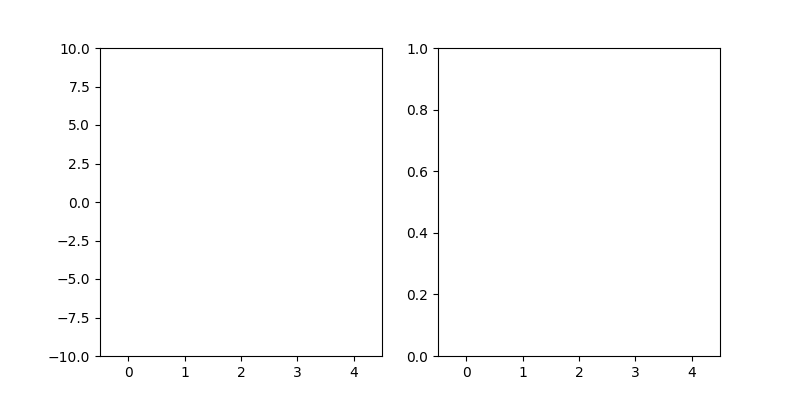

In [12]:
# Softmax Visualization
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def update_plot(ax1, ax2, **sliders):
    values = np.array(list(sliders.values()))
    
    ax1.cla()
    ax2.cla()
    n_sliders = len(values)
    
    ax1.bar(range(n_sliders), values, color='blue')
    ax1.set_xticks(range(n_sliders), labels=list(sliders.keys()))
    ax1.set_title('Before Softmax')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    ax1.set_xlim(-0.5, n_sliders - 0.5)
    ax1.set_ylim(-10, 10)
    ax1.grid()
    
    softmax_values = softmax(values)
    ax2.bar(range(n_sliders), softmax_values, color='green')
    ax2.set_xticks(range(n_sliders), labels=list(sliders.keys()))
    ax2.set_title('After Softmax')
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Probability')
    ax2.set_xlim(-0.5, n_sliders - 0.5)
    ax2.set_ylim(0, 1)
    ax2.grid()

    fig.canvas.draw()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.set_xlim(-0.5, 4.5)
ax1.set_ylim(-10, 10)
ax2.set_xlim(-0.5, 4.5)
ax2.set_ylim(0, 1)

plt.show()

n_sliders = 5
sliders = {chr(97+i): widgets.FloatSlider(value=1.0, min=-10.0, max=10.0, step=0.1, description=chr(97+i)+':') for i in range(n_sliders)}

def interactive_update(**kwargs):
    update_plot(ax1, ax2, **kwargs)

ui = widgets.VBox(list(sliders.values()))
out = widgets.interactive_output(interactive_update, sliders)

layout = widgets.HBox([ui, out])
display(layout)

### Causal Attention

Causal Attention, also known as Masked Self-Attention, is a variation of the standard attention mechanism that enforces a directional flow of information. This is particularly crucial for autoregressive models, where the model is trained to predict the next token in a sequence based on the previous ones.

In the standard self-attention mechanism, each token can attend to every other token in the sequence, including those that come after it. This is the case, for example, with the BERT model, we used in the experiment above, where it predicts the [MASK] tokens within the text.

However, in tasks like language modeling, where the goal is to predict the next word, it makes sense that a token only attends to the tokens before it, not the ones after. To achieve this, Causal Attention masks the attention matrix, ensuring that each token only has access to the previous tokens and itself during the computation.

Here's how it works:

**Masking the Attention Matrix:** Before applying the softmax function, a mask is applied to the matrix $M = Q K^{\top}$. This mask is typically an upper triangular matrix with large negative values (often $-\infty$) in the positions corresponding to future tokens. When the softmax function is applied to this masked matrix, the positions with $-\infty$ are effectively zeroed out ($e^{-\infty} = 0$), ensuring that no information from future tokens leaks into the current token’s attention.

Mathematically, this can be expressed as:
$$
M_\text{masked} = M + \text{mask}
$$
Where the mask is defined as:
$$
\text{mask}[i,j]
\begin{cases}
    0  &\text{if}~~ j \leq i \\
    -\infty &\text{if}~~ j > i
\end{cases}
$$

#### Experiment

Lets have a look at the attention matrices of the 125-Million parameter OPT Model:

In [46]:
# Attention Matrices Experiment
from transformers import AutoTokenizer, AutoModel, pipeline
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model = AutoModel.from_pretrained("facebook/opt-125m")
tokenizer = AutoTokenizer.from_pretrained("facebook/opt-125m")

def plot_attention(text, layer, head, scale_rows):
    inputs = tokenizer(text, return_tensors="pt")
    tokens = [tokenizer.decode(x, clean_up_tokenization_spaces=False) for x in inputs['input_ids'][0]]

    # Get model outputs (including attentions)
    outputs = model(**inputs, output_attentions=True)

    # Extract attentions (this is a tuple of 12 layers, each with its own attention matrix)
    attentions = outputs.attentions

    # Select attention from the first layer
    attention_matrix = attentions[layer][0, head].detach().numpy()
    if scale_rows:
        row_maxes = np.max(attention_matrix, axis=1, keepdims=True)
        attention_matrix /= row_maxes

    # Plot the attention matrix
    plt.figure(figsize=(10, 8))
    if len(tokens) < 10:
        sns.heatmap(attention_matrix, cmap='viridis', annot=True, xticklabels=tokens, yticklabels=tokens)
    elif len(tokens) < 20:
        sns.heatmap(attention_matrix, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    else:
        sns.heatmap(attention_matrix, cmap='viridis')
    plt.title(f"Attention Matrix for Layer {layer}, Head {head}")
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.yticks(rotation=0) 
    plt.show()
    
interact(plot_attention,
         text=widgets.Text(placeholder='Write text here to encode.', description='Input:'),
         layer=widgets.Dropdown(options=range(12), description='Layer:'),
         head=widgets.Dropdown(options=range(12), description='Head:'),
         scale_rows=widgets.Checkbox(value=False, description='Scale each row by maximum')
        );

interactive(children=(Text(value='', description='Input:', placeholder='Write text here to encode.'), Dropdown…

As you may have noticed, understanding the Attention matrix in a semantic or syntactic way isn't always straightforward. However, there are a few key points worth noting:

1. You were able to select `heads` and `layers`. We will dive into Multi-Head Attention and how the attention layers are structured in the Transformer in the next sections. 


2. Since we are using OPT, the Attention matrix will always be lower triangular. This is because OPT is designed to operate in an auto-regressive manner, using causal attention unlike the previous BERT model

3. You may have noticed attention matrices focusing predominantly on the initial token `<\s>`. This phenomenon, known as the "attention sink," is thought to occur because the Softmax operation does not allow for zero attention across all tokens. As a result, any excess attention is "dumped" onto the initial token.

You should also try the following experiments:

1. **Pattern Disruption:** Begin with a consistent pattern over a reasonable number of tokens, then intentionally disrupt the pattern and continue with a different sequence. Observe how this disruption is represented in some of the attention matrices.

2. **Longer Sequences:** Input longer sequences by copying sentences from this notebook or other sources to examine how the model processes extended inputs.

Observations I made:

- **Layer 1, Head 9:** It seems like it is finding the same token in the context at different positions. You could try:
  `A B C D E F G H I J K L M N O P Q R S A B C D E F G H I J K L M N O P Q R S R Q P O N M L K J I H G F E D C B A`


- **Layer 3, Head 3**: It seems like it is good at finding all $n-1$ token given a numerical token $n$. Try `1 2 3 4 5 6 7 8 4 2 3 6 1 5 8 7 9`

### Key-Value Caching

When using a Transformer model in an autoregressive manner—meaning generating a sequence of tokens by iteratively predicting the next token and feeding it back into the model to generate subsequent tokens—key-value caching can significantly reduce computational overhead, especially for longer sequences.

In an autoregressive setup, the model predicts the next token based on the previously generated tokens. Since Causal Attention ensures that each token only attends to previous tokens, the keys $k_0$ to $k_{t-1}$ and values $v_0$ to $v_{t-1}$ computed during the previous steps remain valid for future predictions. These keys and values are solely dependent on past tokens and therefore do not change when a new token is introduced. At the same time we only need the newest query $q_t$.

By caching these already-computed keys and values, the model can reuse them during the generation of subsequent tokens, avoiding the need to recompute them for every new token. This leads to a significant reduction in computation, particularly for long sequences, where the savings in processing time and resources can be substantial.

<div>
<img src="images/kv_caching.gif" width="700"/>
</div>


Let's time text generation with and without K-V Caching for generating sequences of increasing length:

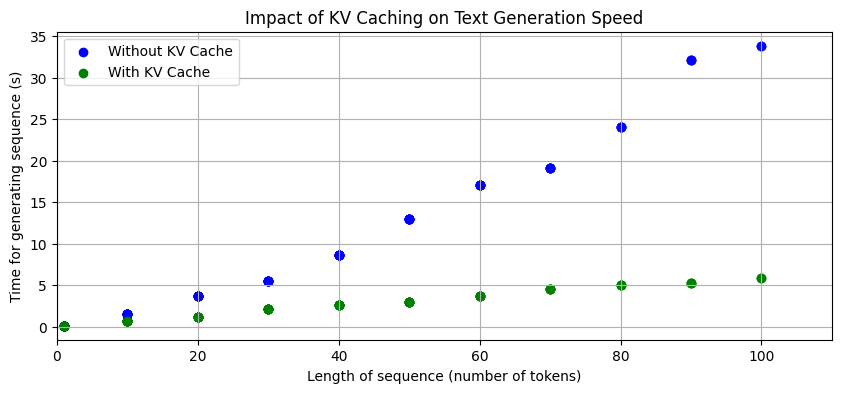

In [47]:
# Key-Value Caching Runtime Analysis
%matplotlib inline
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from tqdm.notebook import tqdm

plt.close('all')

model_name = "facebook/opt-125m"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def generate_text_with_live_plotting(model, tokenizer, prompt, tokens, ax):
    input_ids = tokenizer(prompt, return_tensors="pt")
    
    timings_no_cache = []
    timings_with_cache = []
    token_lengths = []

    for token_len in tokens:
        token_lengths.append(token_len)

        # Measure time without KV Cache
        start_time = time.time()
        with torch.no_grad():
            model.generate(**input_ids, min_new_tokens=token_len, max_new_tokens=token_len, use_cache=False)
        elapsed_time_no_cache = time.time() - start_time
        timings_no_cache.append(elapsed_time_no_cache)

        # Measure time with KV Cache
        start_time = time.time()
        with torch.no_grad():
            model.generate(**input_ids, min_new_tokens=token_len, max_new_tokens=token_len, use_cache=True)
        elapsed_time_with_cache = time.time() - start_time
        timings_with_cache.append(elapsed_time_with_cache)

        # Clear the current output and update plot
        clear_output(wait=True)
        ax.scatter(token_lengths, timings_no_cache, color='blue', label='Without KV Cache')
        ax.scatter(token_lengths, timings_with_cache, color='green', label='With KV Cache')
        ax.set_xlabel('Length of sequence (number of tokens)')
        ax.set_ylabel('Time for generating sequence (s)')
        ax.set_title('Impact of KV Caching on Text Generation Speed')
        ax.set_xlim([0, 110])  # Fixing x-axis limits
        ax.grid(True)

        # Add the legend, but prevent it from adding multiple entries
        handles, labels = ax.get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        ax.legend(by_label.values(), by_label.keys())

        display(ax.figure)

    return timings_no_cache, timings_with_cache

prompt = "Once upon a time"
tokens = [1] + list(range(10, 101, 10))

fig, ax = plt.subplots(figsize=(10, 4))

timings_no_cache, timings_with_cache = generate_text_with_live_plotting(model, tokenizer, prompt, tokens, ax)

clear_output(wait=True)
ax.scatter(tokens, timings_no_cache, color='blue', label='Without KV Cache')
ax.scatter(tokens, timings_with_cache, color='green', label='With KV Cache')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()

### Multi-Head Attention 

While above we looked at a single attention mechanism, Transformers actually use multiple attention "heads" in parallel per layer, a technique known as Multi-Head Attention. Each head has its own set of projection matrices $W_k$, $W_q$, and $W_v$, allowing the model to learn different aspects of the relationships between tokens. Formally, for each head $h$:

$$
Z_h = A_h V_h
$$

where $A_h$ and $V_h$ are the attention and value matrices for the $h^{th}$ head, respectively. The outputs of these heads are then concatenated and linearly transformed to produce the final output of the Multi-Head Attention layer:

$$
\text{MultiHead}(Q, K, V) = \text{Concat}(Z_1, Z_2, \dots, Z_h) \cdot W_o
$$

where $W_o$ is another learnable matrix.

Note that the number of tokens remains unchanged, and this projection occurs on a per-token basis. The vectors are re-projected to the initial embedding dimension, ensuring compatibility with skip connections.

### Intuition Behind Multi-Head Attention

The idea behind using multiple heads is that each head can focus on different parts of the sequence or different types of relationships. For example, one head might learn to focus on syntactic structures (like the relationship between a subject and a verb), while another head might focus on semantic aspects (like capturing context or meaning). By combining these different perspectives, the Transformer can capture a richer and more nuanced understanding of the input sequence.


### Cross Attention

The attention mechanism we've discussed so far is often called self-attention because it compares elements within the same sequence.

Cross attention, however, compares elements between two different sequences instead of within the same one.

For instance, in machine translation, cross attention allows the model to focus on relevant words in the source language when generating a word in the target language. This is essential for producing translations that accurately convey the original meaning.

#### Experiment:

Below, you'll explore the cross attention matrices of the MarianMTModel, a machine translation model. Enter a sentence in English to see how the German translation attends to the original sentence.

In [26]:
# Cross Attention Experiment
%matplotlib widget
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import VBox
import numpy as np
from transformers import MarianMTModel, MarianTokenizer

model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)
model.eval()

cross_attentions = None
input_tokens = None
output_tokens = None

def plot_cross_attention(layer, head):
    global cross_attentions, input_tokens, output_tokens
    
    if cross_attentions is not None:
        attention_matrix = cross_attentions[layer, 0, head]

        with output_area:
            output_area.clear_output(wait=True)
            plt.figure(figsize=(10, 8))

            if len(input_tokens) < 10 and len(output_tokens) < 10:
                sns.heatmap(attention_matrix, cmap='viridis', annot=True, xticklabels=input_tokens, yticklabels=output_tokens)
            elif len(input_tokens) < 20 and len(output_tokens) < 40:
                sns.heatmap(attention_matrix, cmap='viridis', xticklabels=input_tokens, yticklabels=output_tokens)
            else:
                sns.heatmap(attention_matrix, cmap='viridis')

            plt.title(f"Cross-Attention Matrix for Layer {layer}, Head {head}")
            plt.xlabel("Input Tokens")
            plt.ylabel("Output Tokens")
            plt.xticks(rotation=90)
            plt.yticks(rotation=0)
            plt.show()

def on_button_click(b):
    global cross_attentions, input_tokens, output_tokens
    
    with output_area:
        output_area.clear_output()
        print("Please wait...")

    inputs = tokenizer(input_text.value, return_tensors="pt")
    
    translation = model.generate(**inputs, output_attentions=True, return_dict_in_generate=True, use_cache=False, num_beams=1)
    
    input_tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
    output_tokens = tokenizer.convert_ids_to_tokens(translation.sequences[0])
    
    cross_attentions = torch.stack(translation.cross_attentions[-1]).detach().numpy()
    
    plot_cross_attention(layer_dropdown.value, head_dropdown.value)

input_text = widgets.Text(value="Input text here.", description='Input:')
layer_dropdown = widgets.Dropdown(options=range(model.config.num_hidden_layers), description='Layer:')
head_dropdown = widgets.Dropdown(options=range(model.config.num_attention_heads), description='Head:')
generate_button = widgets.Button(description="Generate")

generate_button.on_click(on_button_click)

layer_dropdown.observe(lambda change: plot_cross_attention(change['new'], head_dropdown.value), names='value')
head_dropdown.observe(lambda change: plot_cross_attention(layer_dropdown.value, change['new']), names='value')

output_area = widgets.Output()

display(VBox([input_text, generate_button, layer_dropdown, head_dropdown, output_area]))

Have a look at layer 2, head 1. It seems to directly map the translations to the correct words, even if a ord is split up into multiple tokens or the order is different in the translation. You could try for example: _'thirty-three million, two hundred thirty-one thousand, four hundred fifty-one'_

### Feed Forward Layers

In a Transformer model, the Feed-Forward layers, also known as Multi-Layer Perceptron (MLP) layers, come right after the Multi-Head Attention mechanism. These layers typically consist of linear transformations followed by a nonlinear activation function. What's crucial to understand here is that these MLP layers are applied to each token separately and uniformly, using the same set of weights. This means that there's no interaction or information sharing between different tokens at this stage—they are processed independently. This setup helps the model capture complex patterns within individual tokens before any further mixing of information across tokens happens in the next Attention layers.

### Skip Connections & Norm

[Talk about skip connections]



### From Embeddings to Predictions

Now that you're familiar with the key components of the Transformer model, let's explore how these elements work together in a cohesive structure. The Transformer is typically composed of multiple layers, or blocks, each containing Multi-Head Attention mechanisms, Feed-Forward Neural Networks, and essential features like normalization and skip connections. We'll now examine how these blocks sequentially transform the token embeddings, guiding them through the Transformer architecture until they are projected at the output layer to perform specific tasks.

<div>
<img src="images/block.png" width="200"/>
</div>

#### Experiment:

Below, you'll see a 2D projection (using t-SNE) of tokens in the embedding space between the blocks. The [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) algrithm is effective at showing clusters of data in lower dimensions. To analyze the cosine similarity of tokens within these clusters, each embedding was first normalized so that it lies on the edge of the unit hypersphere in this space. This means that tokens that are close together in this plot, have a high cosine similarity in the embedding space.

Let's consider the initial input: _"a man stands in the rain. a b c d e. he is happy."_ Pay attention to both instances of _"a"_ In the first layer, you'll notice that they have quite a high similarity. However, as you move through the layers, one _"a"_ starts to cluster with the other letters, while the other _"a"_ clusters with _"man"_ and other related tokens. This is actually really interesting because it shows that the model is able to put token in semantic relationships.

Keep in mind that this is a relatively small model, so its capabilities are somewhat limited. Additionally, t-SNE can produce skewed outputs as it prioritizes local structures over global ones. However, with these considerations in mind, feel free to explore the visualization further!

/home/kingkong/miniconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


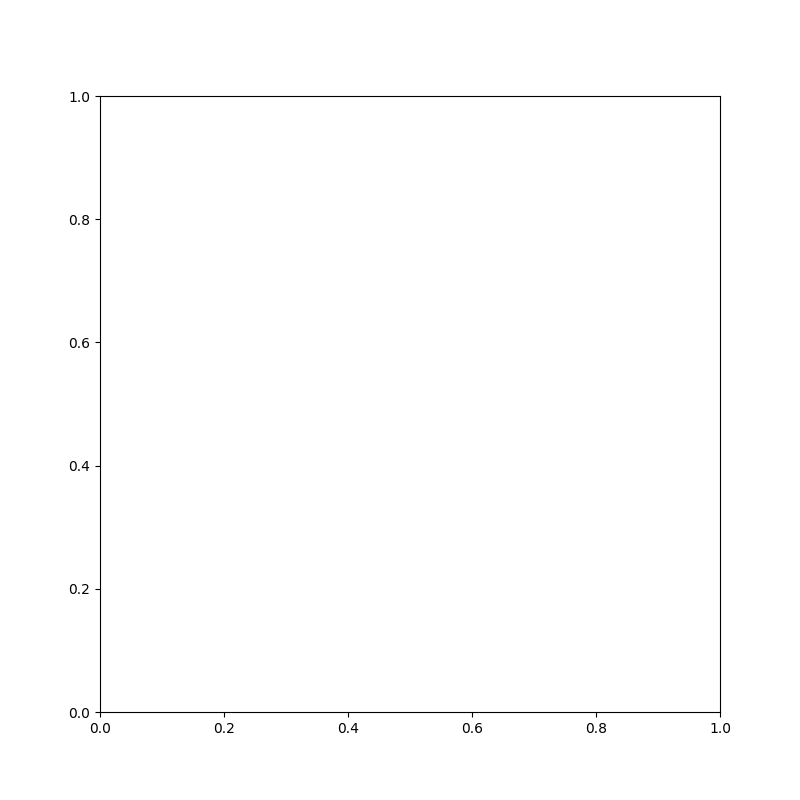

In [22]:
# Visualization of Embeddings over Layers
%matplotlib widget
import torch
from transformers import AutoModel, AutoTokenizer
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import normalize

model_name = "bert-base-uncased"
model = AutoModel.from_pretrained(model_name, output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

reduced_embeddings = None
tokens = None
num_tokens = None
num_layers = None
max_range = None

def get_embeddings(sentence):
    """Get embeddings for each layer given a sentence."""
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    hidden_states = outputs.hidden_states
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    return hidden_states, tokens

def combine_and_normalize_embeddings(hidden_states):
    """Combine and normalize embeddings from all layers."""
    global num_layers, num_tokens
    num_layers = len(hidden_states)
    num_tokens = hidden_states[0].shape[1]
    all_layers = torch.cat([layer.squeeze(0) for layer in hidden_states], dim=0)
    normalized_embeddings = normalize(all_layers.detach().numpy(), axis=1)
    return normalized_embeddings

def compute_tsne(sentence):
    """Compute t-SNE on the combined normalized embeddings for a given sentence."""
    global reduced_embeddings, tokens, num_tokens, num_layers, max_range
    hidden_states, tokens = get_embeddings(sentence)
    combined_hidden_states = combine_and_normalize_embeddings(hidden_states)
    
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=min(30, combined_hidden_states.shape[0] - 1))
    reduced_embeddings = tsne_model.fit_transform(combined_hidden_states)
    
    max_val = np.max(np.abs(reduced_embeddings))
    max_range = max_val * 1.1

def update_plot(layer):
    """Update the plot for the selected layer."""
    global num_tokens, reduced_embeddings, num_layers, max_range
    
    if reduced_embeddings is None or num_tokens is None:
        print("t-SNE has not been computed yet.")
        return
    
    ax.cla()
    start_idx = layer * num_tokens
    end_idx = start_idx + num_tokens
    
    ax.scatter(reduced_embeddings[start_idx:end_idx, 0], reduced_embeddings[start_idx:end_idx, 1], color='red', s=2)
    
    for i, token in enumerate(tokens):
        ax.text(reduced_embeddings[start_idx + i, 0], reduced_embeddings[start_idx + i, 1], token,
                fontsize=9, ha='left', color='black')
    
    ax.set_title(f"t-SNE of normalized Embeddings for Layer {layer}")
    ax.set_xlabel("t-SNE Component 1")
    ax.set_ylabel("t-SNE Component 2")
    
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    
    ax.grid(True)
    fig.canvas.draw_idle()  # Update the plot

fig, ax = plt.subplots(figsize=(8, 8))
plt.show()

sentence_input = widgets.Text(value="a man stands in the rain. a b c d e. he is happy", description='Sentence:')
compute_button = widgets.Button(description="Compute t-SNE")

layer_slider = widgets.IntSlider(value=0, min=0, max=12, step=1, description='Layer:')

def on_button_click(_):
    """Handle button click to compute t-SNE and update plot."""
    compute_tsne(sentence_input.value)
    layer_slider.max = num_layers - 1  # Update the slider's max value based on the number of layers
    update_plot(0)  # Update plot for the initial layer after computing t-SNE

compute_button.on_click(on_button_click)
layer_slider.observe(lambda change: update_plot(change['new']), names='value')

ui = widgets.VBox([sentence_input, compute_button, layer_slider])
display(ui)

ax.set_title("Enter a sentence and click the button to compute t-SNE")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.grid(True)

To solve a specific task with the Transformer model, a linear layer is typically added after the final block to project the information from a single token, often a special token like '[MASK]' or '[CLS]', into an output distribution using softmax. This configuration can be adapted for various tasks. For instance, a distribution over the entire vocabulary can be used for masked token prediction or text generation, while a distribution over class labels can be used for tasks like sentiment analysis, among others.

### Types of Transformer Networks

Similar to RNN's Transformers are categorized based on how they process input data and generate output. They can be classified into three main categories: Encoder-only, Decoder-only, and Encoder-Decoders.

**Encoders** are designed to process input sequences and generate a contextualized representation of the input. They are used primarily for tasks where the focus is on understanding or encoding the input data, such as in text classification or feature extraction tasks. Models like BERT fall into this category.

**Decoders** are designed to generate sequences, often used in scenarios where the goal is to produce output text or sequences based on some input, such as in text generation or auto-regressive tasks. The output is a sequence of tokens generated one at a time, where each new token is conditioned on previously generated tokens. This sequential generation is critical for tasks that require auto-regression. Models like GPT-2 or OPT fall int this category.

**Sequence to Sequence** models combine both encoders and decoders, making them suitable for tasks where the model needs to transform an input sequence into a different output sequence, such as in machine translation or summarization. The output is a transformed sequence based on the input sequence, where the output sequence may be in a different language, summarizing the input, or performing some other transformation. Models like MarianMT fall into this category.

## Fine Tuning

[Explain how models like BERT or OPT are fine-tuned on tasks (maybe add widget which does this]

## In context Learning

[Explain in context learning; With models having good ICL capabilities does it makes sense to rather use ICL instead of fine-tuning?; Show that context can improve results by a great deal. Widget idea: give multiple times similar tasks with solution without describing the task itself and then a task without solution and see if the model is able to solve it]

## Transformer ALternatives

### Issues of the Transformer model

[Talk about problems the transformer model has (quadratic complexity of self attention, high memory consumption, problems with long range dependencies)...]

### Extensions and Alternatives

[Talk about Transformer extensions (i.e. Reformer, Longformer, Switchformer) and alternatives (i.e. recurrent models like MAMBA, RWKV etc)]



# Transformer Terminology

**Context:**
A context refers to an input sequence in a Transformer, typically involving a set of tokens that are related in some manner.

**Token:**
A token is a discrete unit within the context, often represented by an embedded input vector. In language processing, a token might be a word, letter, or a combination of characters.

**Embedding-Space:**
The embedding space is where tokens are encoded, maintaining a consistent dimensionality throughout the Transformer, despite undergoing various transformations.

[add all needed terminologies in short form here]

# Bibliography

[add citations here]

# TODOS:
1. add sources for information
2. finish the text
3. check the order of everything
4. add cell at top which uses pip to install all necessary libraries